In [4]:
conda install -c conda-forge librosa

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\janan\anaconda3

  added / updated specs:
    - librosa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.2.0              |       hcfcfb64_1         7.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.9 MB

The following packages will be UPDATED:

  openssl                                  3.2.0-hcfcfb64_0 --> 3.2.0-hcfcfb64_1 




openssl-3.2.0        | 7.9 MB    |            |   0% 
openssl-3.2.0        | 7.9 MB    |            |   0% 
openssl-3.2.0        | 7.9 MB    | 1          |   2% 
openssl-3.2.0        | 7.9 MB    | 3          |   3% 
openssl-3.2.0        | 7.9 MB    | 4          |   4% 
openssl-3.2.0        | 7.9 MB    | 5          |   6% 
opens



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [6]:
df=pd.read_csv('C:/Users/janan/OneDrive/Desktop/Data/features_3_sec.csv')

In [7]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [8]:
df.shape

(9990, 60)

In [8]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [9]:
df=df.drop(labels='filename',axis=1) 

In [10]:
audio_recording= "C:/Users/janan/OneDrive/Desktop/Data/genres_original/country/country.00050.wav"
data, sr=librosa.load(audio_recording)
print(type(data),type(sr)) 

<class 'numpy.ndarray'> <class 'int'>


In [11]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04446705,  0.06373049,  0.05768819, ..., -0.13878523,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

In [12]:
import IPython
Ipython.display.Audio(data, rate=sr)

NameError: name 'Ipython' is not defined

In [13]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [14]:
import IPython as ip

In [15]:
ip.display.Audio(data, rate=sr)

In [16]:
!pip install --upgrade librosa

In [17]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

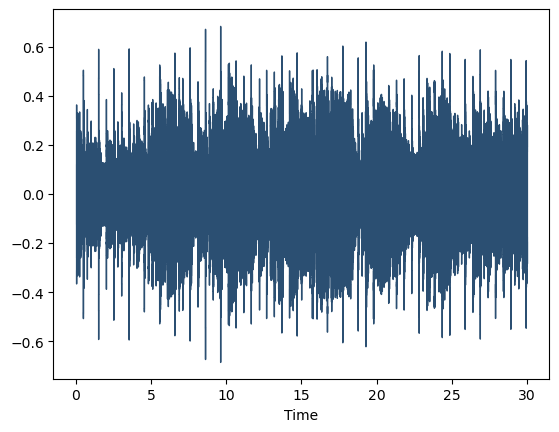

In [18]:
librosa.display.waveshow(data,color="#2B4F72")

In [19]:
stft=librosa.stft(data)

In [20]:
stft_db=librosa.amplitude_to_db(abs(stft))

C:\Users\janan\AppData\Local\Temp\ipykernel_23540\1842277059.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


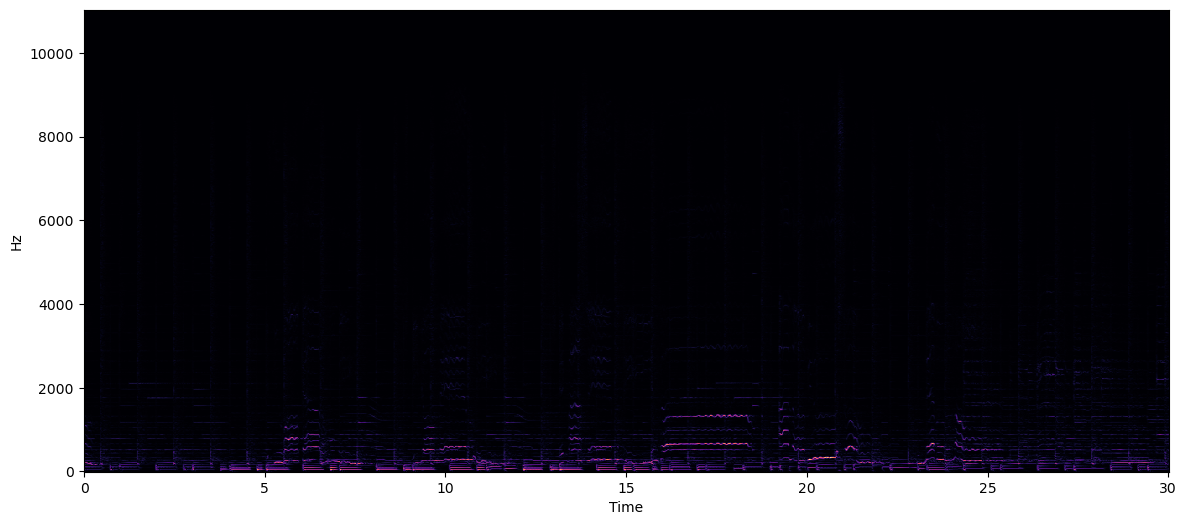

In [21]:
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')

<Figure size 1400x600 with 0 Axes>

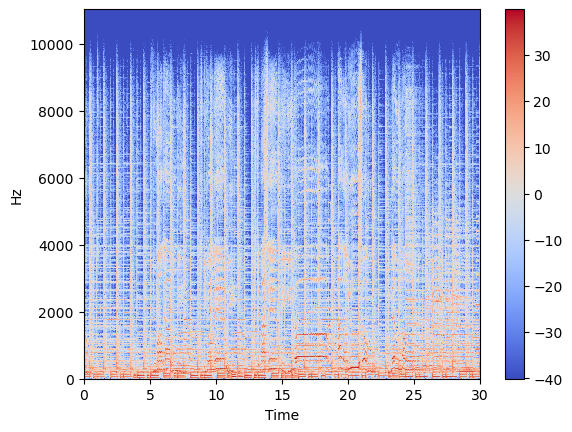

<Figure size 1400x600 with 0 Axes>

In [22]:
stft = librosa.stft(data) 
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))

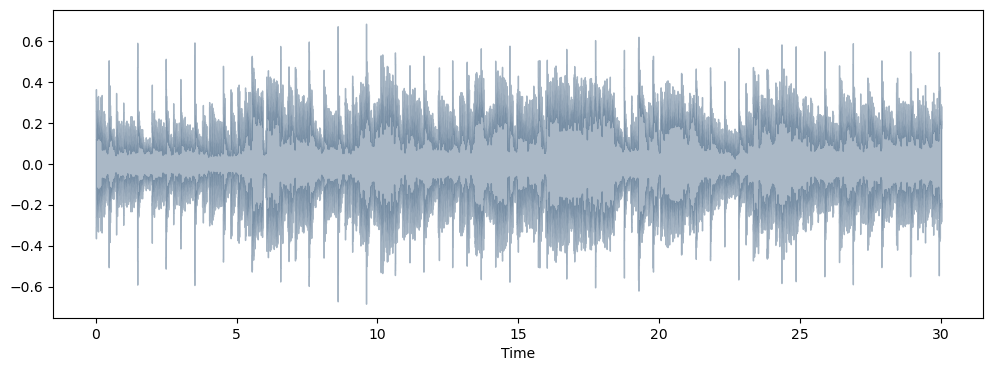

In [58]:
from sklearn.preprocessing import normalize 
spectral_rolloff = librosa.feature.spectral_rolloff (y=data+0.01, sr=sr)[0] 
plt.figure(figsize=(12, 4)) 
librosa.display.waveshow(data, sr=sr, alpha=0.4, color = "#2B4F72")


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

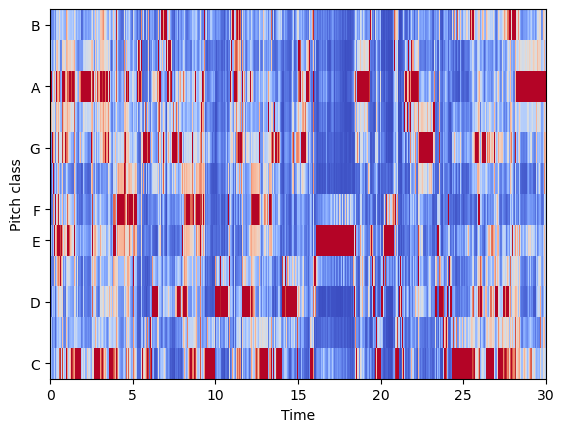

<Figure size 1600x600 with 0 Axes>

In [24]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=data, sr=sr) 
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.figure(figsize=(16,6))
plt.colorbar()
plt.title("Chroma Features")

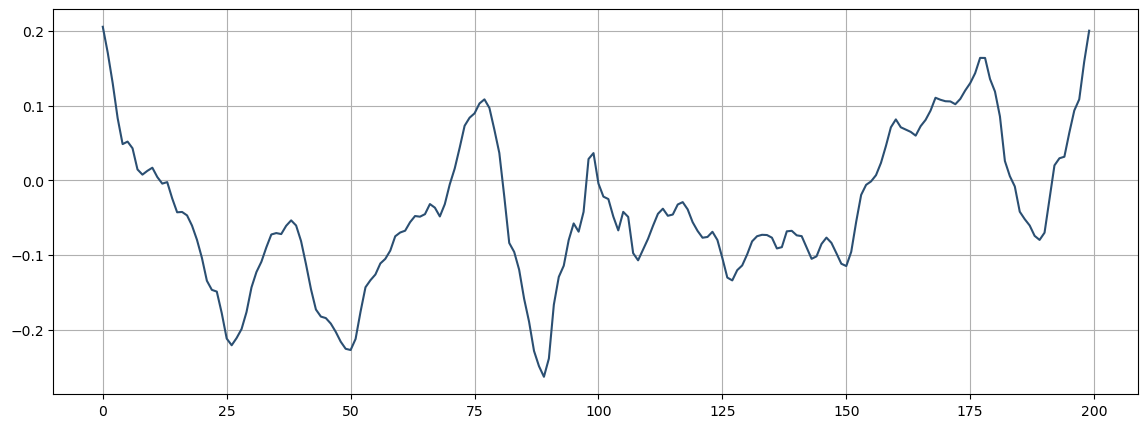

In [27]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [28]:
zero_cross_rate = librosa.zero_crossings(data[start: end], pad=False) 
print("The number of zero-crossings is :", sum (zero_cross_rate))

The number of zero-crossings is : 8


In [29]:
class_list=df.iloc[:,-1]
convertor=LabelEncoder()

In [30]:
y=convertor.fit_transform(class_list)
print(y)

[0 0 0 ... 9 9 9]


In [57]:
import joblib
joblib.dump(convertor, 'label_encoder.joblib')

['label_encoder.joblib']

In [31]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [32]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
x=fit.fit_transform(np.array(df.iloc[:,:-1], dtype=float))

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [34]:
len(y_train)

6693

In [35]:
len(y_test)

3297

In [36]:
import keras as k
from keras.models import Sequential 

In [37]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')
    
    return model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

In [38]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [59]:
print(x_train.shape)

(6693, 58)


In [39]:
model=k.models.Sequential([
    k.layers.Dense(512,activation='relu',input_shape=(x_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(10,activation='softmax'),  
])
print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                

53/53 [==============================] - 0s 8ms/step - loss: 0.0890 - accuracy: 0.9728 - val_loss: 0.3706 - val_accuracy: 0.9054
Epoch 42/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0788 - accuracy: 0.9737 - val_loss: 0.3757 - val_accuracy: 0.9084
Epoch 43/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0829 - accuracy: 0.9725 - val_loss: 0.3535 - val_accuracy: 0.9096
Epoch 44/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0699 - accuracy: 0.9794 - val_loss: 0.3565 - val_accuracy: 0.9087
Epoch 45/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.3596 - val_accuracy: 0.9108
Epoch 46/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0785 - accuracy: 0.9749 - val_loss: 0.3775 - val_accuracy: 0.9090
Epoch 47/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0687 - accuracy: 0.9773 - val_loss: 0.3572 - val_accuracy: 0.9117
Epoch 48/600
53/53 

Epoch 99/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.3775 - val_accuracy: 0.9208
Epoch 100/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.3879 - val_accuracy: 0.9175
Epoch 101/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9907 - val_loss: 0.3702 - val_accuracy: 0.9230
Epoch 102/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.3698 - val_accuracy: 0.9221
Epoch 103/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0397 - accuracy: 0.9854 - val_loss: 0.3915 - val_accuracy: 0.9202
Epoch 104/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.3649 - val_accuracy: 0.9254
Epoch 105/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.3584 - val_accuracy: 0.9242


53/53 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.9915 - val_loss: 0.4127 - val_accuracy: 0.9281
Epoch 157/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0220 - accuracy: 0.9948 - val_loss: 0.3935 - val_accuracy: 0.9263
Epoch 158/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 0.4335 - val_accuracy: 0.9260
Epoch 159/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.4506 - val_accuracy: 0.9193
Epoch 160/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.4002 - val_accuracy: 0.9251
Epoch 161/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0215 - accuracy: 0.9940 - val_loss: 0.3975 - val_accuracy: 0.9205
Epoch 162/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.4024 - val_accuracy: 0.9196
Epoch 163/600

53/53 [==============================] - 0s 8ms/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.4573 - val_accuracy: 0.9254
Epoch 214/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.4818 - val_accuracy: 0.9248
Epoch 215/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.9913 - val_loss: 0.4950 - val_accuracy: 0.9217
Epoch 216/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.4967 - val_accuracy: 0.9242
Epoch 217/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.4677 - val_accuracy: 0.9284
Epoch 218/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.4730 - val_accuracy: 0.9242
Epoch 219/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 0.4556 - val_accuracy: 0.9205
Epoch 220/600

53/53 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.4386 - val_accuracy: 0.9302
Epoch 271/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.4826 - val_accuracy: 0.9236
Epoch 272/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9939 - val_loss: 0.4370 - val_accuracy: 0.9299
Epoch 273/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.4490 - val_accuracy: 0.9217
Epoch 274/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.4997 - val_accuracy: 0.9221
Epoch 275/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.4446 - val_accuracy: 0.9257
Epoch 276/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.9916 - val_loss: 0.4562 - val_accuracy: 0.9296
Epoch 277/600

53/53 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.4355 - val_accuracy: 0.9348
Epoch 328/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0175 - accuracy: 0.9937 - val_loss: 0.4105 - val_accuracy: 0.9375
Epoch 329/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.4443 - val_accuracy: 0.9345
Epoch 330/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.4598 - val_accuracy: 0.9296
Epoch 331/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.4766 - val_accuracy: 0.9327
Epoch 332/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.9958 - val_loss: 0.4833 - val_accuracy: 0.9275
Epoch 333/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 0.9945 - val_loss: 0.4628 - val_accuracy: 0.9284
Epoch 334/600

53/53 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.4522 - val_accuracy: 0.9272
Epoch 385/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.4822 - val_accuracy: 0.9287
Epoch 386/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.4574 - val_accuracy: 0.9315
Epoch 387/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.4471 - val_accuracy: 0.9308
Epoch 388/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.4532 - val_accuracy: 0.9321
Epoch 389/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9946 - val_loss: 0.4663 - val_accuracy: 0.9308
Epoch 390/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - accuracy: 0.9949 - val_loss: 0.4443 - val_accuracy: 0.9321
Epoch 391/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.9970 - val_loss: 0.4794 - val_accuracy: 0.9290
Epoch 442/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.5394 - val_accuracy: 0.9242
Epoch 443/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.9948 - val_loss: 0.5018 - val_accuracy: 0.9287
Epoch 444/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 0.9957 - val_loss: 0.5213 - val_accuracy: 0.9299
Epoch 445/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.5014 - val_accuracy: 0.9284
Epoch 446/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.4548 - val_accuracy: 0.9260
Epoch 447/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.4776 - val_accuracy: 0.9248
Epoch 448/600

53/53 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.5807 - val_accuracy: 0.9281
Epoch 499/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.5657 - val_accuracy: 0.9269
Epoch 500/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 0.9957 - val_loss: 0.5250 - val_accuracy: 0.9287
Epoch 501/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.4676 - val_accuracy: 0.9315
Epoch 502/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.5230 - val_accuracy: 0.9293
Epoch 503/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.5160 - val_accuracy: 0.9290
Epoch 504/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0140 - accuracy: 0.9949 - val_loss: 0.5068 - val_accuracy: 0.9272
Epoch 505/600

53/53 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.4717 - val_accuracy: 0.9315
Epoch 556/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.9955 - val_loss: 0.4699 - val_accuracy: 0.9345
Epoch 557/600
53/53 [==============================] - 0s 7ms/step - loss: 0.0097 - accuracy: 0.9961 - val_loss: 0.4880 - val_accuracy: 0.9269
Epoch 558/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.5037 - val_accuracy: 0.9302
Epoch 559/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.4755 - val_accuracy: 0.9311
Epoch 560/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.9972 - val_loss: 0.4743 - val_accuracy: 0.9342
Epoch 561/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.5229 - val_accuracy: 0.9305
Epoch 562/600

In [40]:
test_loss,test_acc=model.evaluate(x_test,y_test,batch_size=128)
print("Test loss= ", test_loss)
print("\nThe best accuracy= ",test_acc*100)

26/26 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.9299
Test loss=  0.5199907422065735

The best accuracy=  92.99362897872925


In [55]:
model.save('cnn.h5')

C:\Users\janan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
class_list= ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [42]:
audio_path='C:/Users/janan/Downloads/The-Kid-Laroi-Stay-Ft-Justin-Bieber.mp3'

In [43]:
import librosa
import librosa.display

In [44]:
y, sr = librosa.load(audio_path, duration=3) 
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)

In [45]:
input_data = np.expand_dims(mfccs, axis=0)
input_data = (input_data - np.mean(input_data, axis=(1, 2), keepdims=True)) / np.std(input_data, axis=(1, 2), keepdims=True)

In [46]:
flattened_mfccs = mfccs.reshape(mfccs.shape[0], -1)

In [47]:
flattened_input_data = input_data.reshape(input_data.shape[0], -1)
print(flattened_input_data.shape)

(1, 1690)


In [48]:
input_data = input_data.reshape((1, -1))

In [49]:
selected_features = input_data[:, :58]
print(selected_features.shape)

(1, 58)


In [50]:
predicted_class_index = model.predict(selected_features)

1/1 [==============================] - 0s 99ms/step


In [51]:
predicted_class = np.argmax(predicted_class_index)

In [52]:
predicted_genre=class_list[predicted_class]

In [53]:
predicted_class_index=print(f"Predicted class: {predicted_class}")

Predicted class: 1


In [54]:
print(class_list[predicted_class])

classical
